#Question1

1 Data source: dataset generated in Assignment-1 Q-3
Write a program for the SVD from scratch using eigen decomposi7on on the data matrix 𝑋. Use the top 𝑘 singular vectors to reconstruct the data matrix 𝑋#. Plot the reconstruc7on error ||𝑋 − 𝑋#||! for 𝑘 = 1,2, …

Method-1

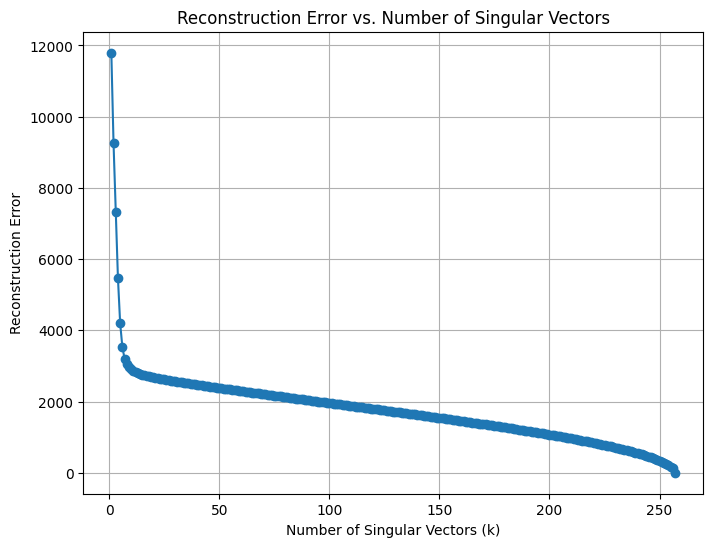

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the frequency histograms from CSV files
train_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment1/MNIST_HISTOGRAM/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/EE511_Assignments/D22180_Nandani_Sharma_Assignment1/MNIST_HISTOGRAM/test.csv')

# Convert dataframes to numpy arrays
X_train = train_df.to_numpy()
X_test = test_df.to_numpy()

# Function to calculate SVD using eigen decomposition
def svd_eigen_decomposition(X):
    eigenvalues, eigenvectors = np.linalg.eigh(X.T @ X)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    singular_values = np.sqrt(eigenvalues)
    return eigenvectors, singular_values

# Function to reconstruct data matrix using top k singular vectors
def reconstruct_data(X, eigenvectors, k):
    return X @ eigenvectors[:, :k] @ eigenvectors[:, :k].T

# Calculate SVD for the training data
eigenvectors, singular_values = svd_eigen_decomposition(X_train)

# Plot reconstruction error for different values of k
reconstruction_errors = []
for k in range(1, min(X_train.shape[0], X_train.shape[1])+1):
    X_reconstructed = reconstruct_data(X_train, eigenvectors, k)
    error = np.linalg.norm(X_train - X_reconstructed)
    reconstruction_errors.append(error)

# Plot reconstruction error
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(reconstruction_errors) + 1), reconstruction_errors, marker='o')
plt.xlabel('Number of Singular Vectors (k)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Singular Vectors')
plt.grid(True)
plt.show()
